In [5]:
## Import modules/libraries
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from datetime import date, timedelta

%cd '/home/jovyan/dev/dea-notebooks/Claire/Qld_DES_files/'

/home/jovyan/dev/dea-notebooks/Claire/Qld_DES_files


In [6]:
## import imagery results from 'Intertidal_seagrass.ipynb'
# %store -r results2

In [7]:
# ## Open Sentinel imagery results

# with open('Burrum_Heads_polygons_imagery_results2dict.pickle', 'wb') as handle:
with open('Pigeon_Sentinel_results2_withtemporalstats_2013-01-01_.pickle', 'rb') as handle:
    S2_results2 = pickle.load(handle)
#     pickle.dump(results2, handle)

In [8]:
# ## Open Landsat imagery results

# with open('Burrum_Heads_polygons_imagery_results2dict.pickle', 'wb') as handle:
with open('Pigeon_Landsat_results2_withtemporalstats_1988-01-01_.pickle', 'rb') as handle:
    results2 = pickle.load(handle)
#     pickle.dump(results2, handle)

In [5]:
# results2 = pickle.load(open('results2_withtemporalstats_1988-01-01_Dundowran_Qld.pickle', 'rb'))
# results2
# field_df

In [9]:
## Import seagrass watch point data
# %cd '/home/jovyan/dev/dea-notebooks/Claire/'
# point_data = 'Manual_translation_of BH1_and_BH3_pc_seagrass_cover_from_seagrasswatchdotorg.csv'
point_data = 'Pigeon_pcCover.csv'
# point_data = 'Manual_translation_of_Urangan_data_from_seagrasswaterdotorg.csv'
field_df = pd.read_csv(point_data)
# # Remove empty rows
# field_df = field_df.loc[0:56]
## Turn string dates into datetimes
field_df['time'] = pd.to_datetime(field_df['Date'], format='%b-%y')
## Replace index
field_df.set_index(field_df.time, inplace=True)

In [47]:
# field_df
# results2['30']['2'] 140,3;
pgid = []
feat = []

for k in S2_results2:
    print (k)
    pgid.append(k)
    for kk in S2_results2[k]:
        print(kk)
        feat.append(kk)
        
print(pgid, feat)

2
0
3
1
['2', '3'] ['0', '1']


In [50]:
## Sentinel2 results
## This cell processes datasets that contain results for two polygons (pg1, pg2)

pg1_NDVI = S2_results2[pgid[0]][feat[0]].resample(time='1MS').mean(dim='time')
pg1_NDVI = pg1_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg1_NDVI = pg1_NDVI.to_dataframe()
pg1_NDVI = pg1_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'S2_pg1_NDVI'})
S2_pg1_NDVI = pg1_NDVI.drop('spatial_ref', axis=1)
# BH1_NDVI.head()


pg2_NDVI = S2_results2[pgid[1]][feat[1]].resample(time='1MS').mean(dim='time')
pg2_NDVI = pg2_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg2_NDVI = pg2_NDVI.to_dataframe()
pg2_NDVI = pg2_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'S2_pg2_NDVI'})
S2_pg2_NDVI = pg2_NDVI.drop('spatial_ref', axis=1)
# BH3_NDVI.head()

## Create empty continuous daterange to join dataframes to
start, end = date(1988, 8, 1), date(2021, 9, 1)
date_range = pd.date_range(start, end, freq = 'MS')

## Create master dataframe, 'alldates'
S2_alldates = pd.DataFrame(index=date_range)

## Join BH1
S2_alldates = S2_alldates.join(S2_pg1_NDVI, how='left')

## Join BH3
S2_alldates_pg1_pg2 = S2_alldates.join(S2_pg2_NDVI, how='left')

# ## Join field_df (seagrasswatch observations)
# S2_alldates_all = S2_alldates_BH1_BH3.join(field_df, how='left')

# S2_alldates_pg1_pg2

In [49]:
## Landsat

pg1_NDVI = results2[pgid[0]][feat[0]].resample(time='1MS').mean(dim='time')
pg1_NDVI = pg1_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg1_NDVI = pg1_NDVI.to_dataframe()
pg1_NDVI = pg1_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'LS_pg1_NDVI'})
pg1_NDVI = pg1_NDVI.drop('spatial_ref', axis=1)



pg2_NDVI = results2[pgid[1]][feat[1]].resample(time='1MS').mean(dim='time')
pg2_NDVI = pg2_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg2_NDVI = pg2_NDVI.to_dataframe()
pg2_NDVI = pg2_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'LS_pg2_NDVI'})
pg2_NDVI = pg2_NDVI.drop('spatial_ref', axis=1)


## Create empty continuous daterange to join dataframes to
start, end = date(1988, 8, 1), date(2021, 9, 1)
date_range = pd.date_range(start, end, freq = 'MS')

## Create master dataframe, 'alldates'
alldates = pd.DataFrame(index=date_range)

## Join BH1
alldates = alldates.join(pg1_NDVI, how='left')

## Join BH3
LS_alldates_pg1_pg2 = alldates.join(pg2_NDVI, how='left')

# ## Join field_df (seagrasswatch observations)
# LS_alldates_all = alldates_BH1_BH3.join(field_df, how='left')

In [15]:
# alldates
# print(S2_alldates_all.index)
# print(LS_alldates_all.index)

# S2_alldates_all

In [16]:

# blended

# test = pd.concat([S2_alldates_BH1_BH3, LS_alldates_BH1_BH3])#, how='left', on=['Date'])
# test

In [17]:
# print(test.index)
# print(LS_alldates_all.index)

In [18]:
# ## Burrum Heads - landsat

# BH1_NDVI = results2['5']['4'].resample(time='1MS').mean(dim='time')
# BH1_NDVI = BH1_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
# BH1_NDVI = BH1_NDVI.to_dataframe()
# BH1_NDVI = BH1_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'BH1_NDVI'})
# BH1_NDVI = BH1_NDVI.drop('spatial_ref', axis=1)
# # BH1_NDVI.head()


# BH3_NDVI = results2['50']['9'].resample(time='1MS').mean(dim='time')
# BH3_NDVI = BH3_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
# BH3_NDVI = BH3_NDVI.to_dataframe()
# BH3_NDVI = BH3_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'BH3_NDVI'})
# BH3_NDVI = BH3_NDVI.drop('spatial_ref', axis=1)
# # BH3_NDVI.head()

In [19]:
# ## Urangan

# Ura_NDVI = results2['30']['2'].resample(time='1MS').mean(dim='time')
# Ura_NDVI = Ura_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
# Ura_NDVI = Ura_NDVI.to_dataframe()
# Ura_NDVI = Ura_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'Ura_NDVI'})
# Ura_NDVI = Ura_NDVI.drop('spatial_ref', axis=1)
# # Ura_NDVI.head()

In [20]:
# field_df.head()

In [21]:
# ## Create empty continuous daterange to join dataframes to


# start, end = date(1988, 8, 1), date(2021, 9, 1)
# date_range = pd.date_range(start, end, freq = 'MS')

# ## Create master dataframe, 'alldates'

# alldates = pd.DataFrame(index=date_range)

# ## Join BH1

# alldates = alldates.join(BH1_NDVI, how='left')

# ## Join BH3

# alldates_BH1_BH3 = alldates.join(BH3_NDVI, how='left')

# ## Join field_df (seagrasswatch observations)

# alldates_all = alldates.join(field_df, how='left')

In [22]:
# alldates_all.tail(375)
# BH1_NDVI.plot()
# field_df.columns

In [23]:
# fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(15,10), sharex=True)
# alldates_all.Ura_NDVI.dropna(axis='index').plot(ax=ax1)
# alldates_all['UG1 % seagrass cover'].dropna(axis='index').plot(ax=ax2)
# alldates_all['UG1 Canopy cover (cm)'].dropna(axis='index').plot(ax=ax3)
# alldates_all['UG1 algae % cover'].dropna(axis='index').plot(ax=ax4)
# alldates_all['UG1 epiphyte % cover'].dropna(axis='index').plot(ax=ax5)

# # fig.suptitle('Profile: UG1')
# ax1.set_title('Profile: UG1')
# ax1.set_ylabel('Ura NDVI')
# ax2.set_ylabel('seagrass %')
# ax3.set_ylabel('canopy height')
# ax4.set_ylabel('% algae')
# ax5.set_ylabel('% epiphyte')

# ax1.set_xlim(xmin='1999') 

In [24]:
# fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(15,10), sharex=True)
# alldates_all.Ura_NDVI.dropna(axis='index').plot(ax=ax1)
# alldates_all['UG2 % seagrass cover'].dropna(axis='index').plot(ax=ax2)
# alldates_all['UG2 Canopy cover (cm)'].dropna(axis='index').plot(ax=ax3)
# alldates_all['UG2 algae % cover'].dropna(axis='index').plot(ax=ax4)
# alldates_all['UG2 epiphyte % cover'].dropna(axis='index').plot(ax=ax5)

# ax1.set_title('Profile: UG2')
# ax1.set_ylabel('Ura NDVI')
# ax2.set_ylabel('seagrass %')
# ax3.set_ylabel('canopy height')
# ax4.set_ylabel('% algae')
# ax5.set_ylabel('% epiphyte')

# ax1.set_xlim(xmin='1999') 

In [25]:
# concattest = test
# concattest.index

In [26]:
# concattest.index.duplicated(keep='first')

In [51]:
## Blend the Burrum Heads Landsat and Sentinel results
blended = LS_alldates_pg1_pg2.join(S2_alldates_pg1_pg2, how='left')

## Blend the satellite results with the field data
Blended = pd.merge(blended, field_df, left_on=blended.index, right_on=field_df.index)
Blended.drop('key_0', axis=1)
Blended.set_index('time', drop=True)

Blended

# testmerge2.drop('key_0', axis=1)
# testmerge2.set_index('time', drop=True)

,key_0,LS_pg1_NDVI,LS_pg2_NDVI,S2_pg1_NDVI,S2_pg2_NDVI,Date,PI2 % seagrass cover,PI3 % seagrass cover,time
0,1999-09-01,0.142363,0.126989,NaN,NaN,Sep-99,26.0,9.3,1999-09-01
1,1999-12-01,NaN,NaN,NaN,NaN,Dec-99,55.9,36.7,1999-12-01
2,2000-03-01,NaN,NaN,NaN,NaN,Mar-00,33.1,15.4,2000-03-01
3,2000-07-01,NaN,NaN,NaN,NaN,Jul-00,18.8,6.5,2000-07-01
4,2000-09-01,0.149472,0.139112,NaN,NaN,Sep-00,25.9,9.9,2000-09-01
...,...,...,...,...,...,...,...,...,...
57,2019-05-01,0.103838,0.101803,0.119283,0.135994,May-19,12.8,5.1,2019-05-01
58,2019-09-01,NaN,NaN,NaN,NaN,Sep-19,7.4,10.5,2019-09-01
59,2020-05-01,0.104810,0.117518,0.186012,0.141038,May-20,22.7,15.7,2020-05-01
60,2020-09-01,NaN,NaN,NaN,NaN,Sep-20,25.3,11.2,2020-09-01


In [28]:
# # testmerge2
# field_df

In [29]:
# ## Burrum Heads

# testmerge = BH1_NDVI.join(BH3_NDVI, how='left')
# testmerge2 = pd.merge(testmerge, field_df, left_on=testmerge.index, right_on=field_df.index)
# testmerge2.drop('key_0', axis=1)
# testmerge2.set_index('time', drop=True)

In [30]:
# ## Urangan

# testmerge2 = pd.merge(Ura_NDVI, field_df, left_on=Ura_NDVI.index, right_on=field_df.index)
# testmerge2.drop('key_0', axis=1)
# testmerge2.set_index('time', drop=True)

In [31]:
# k[1]
# testmerge2.columns
# for k in Blended.iterrows():
# #     print (k)
#     ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][3]))
#     ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
#     ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][4]))
#     ax4.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
#     ax5.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][7]))
#     ax6.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
#     ax7.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][9]))
#     ax8.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][10]))

#     ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][3]))
#     ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][4]))
#     ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][5]))
#     ax4.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
#     ax5.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][7]))
#     ax6.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
#     ax7.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][9]))
#     ax8.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][10]))

Blended.columns

Index(['key_0', 'LS_BH1_NDVI', 'LS_BH3_NDVI', 'S2_BH1_NDVI', 'S2_BH3_NDVI',
       'Date', 'PI2 % seagrass cover', 'PI3 % seagrass cover', 'time'],
      dtype='object')

In [34]:
# ## Setting minimum seagrass coverage threshold to filer out background NDVI values

# thresh = 0

# bh1 = Blended[Blended['PI2 % seagrass cover']>thresh]
# # bh1_s2 = Blended[Blended['S2_BH1_NDVI']>thresh]
# # bh3 = Blended[Blended['PI3 % seagrass cover']>thresh]
# # bh3_s2 = Blended[Blended['S2_BH3_NDVI']>thresh]

In [122]:
# bh3_s2
# pg1 = 'PI2'
# pg2 = 'PI3'
# Blended.columns#[-3]
# forBlended.iterrows()
# k[1]
# Blended

,key_0,LS_pg1_NDVI,LS_pg2_NDVI,S2_pg1_NDVI,S2_pg2_NDVI,Date,PI2 % seagrass cover,PI3 % seagrass cover,time
0,1999-09-01,0.142363,0.126989,NaN,NaN,Sep-99,26.0,9.3,1999-09-01
1,1999-12-01,NaN,NaN,NaN,NaN,Dec-99,55.9,36.7,1999-12-01
2,2000-03-01,NaN,NaN,NaN,NaN,Mar-00,33.1,15.4,2000-03-01
3,2000-07-01,NaN,NaN,NaN,NaN,Jul-00,18.8,6.5,2000-07-01
4,2000-09-01,0.149472,0.139112,NaN,NaN,Sep-00,25.9,9.9,2000-09-01
...,...,...,...,...,...,...,...,...,...
57,2019-05-01,0.103838,0.101803,0.119283,0.135994,May-19,12.8,5.1,2019-05-01
58,2019-09-01,NaN,NaN,NaN,NaN,Sep-19,7.4,10.5,2019-09-01
59,2020-05-01,0.104810,0.117518,0.186012,0.141038,May-20,22.7,15.7,2020-05-01
60,2020-09-01,NaN,NaN,NaN,NaN,Sep-20,25.3,11.2,2020-09-01


Text(0.5, 1.0, '% seagrass cover')

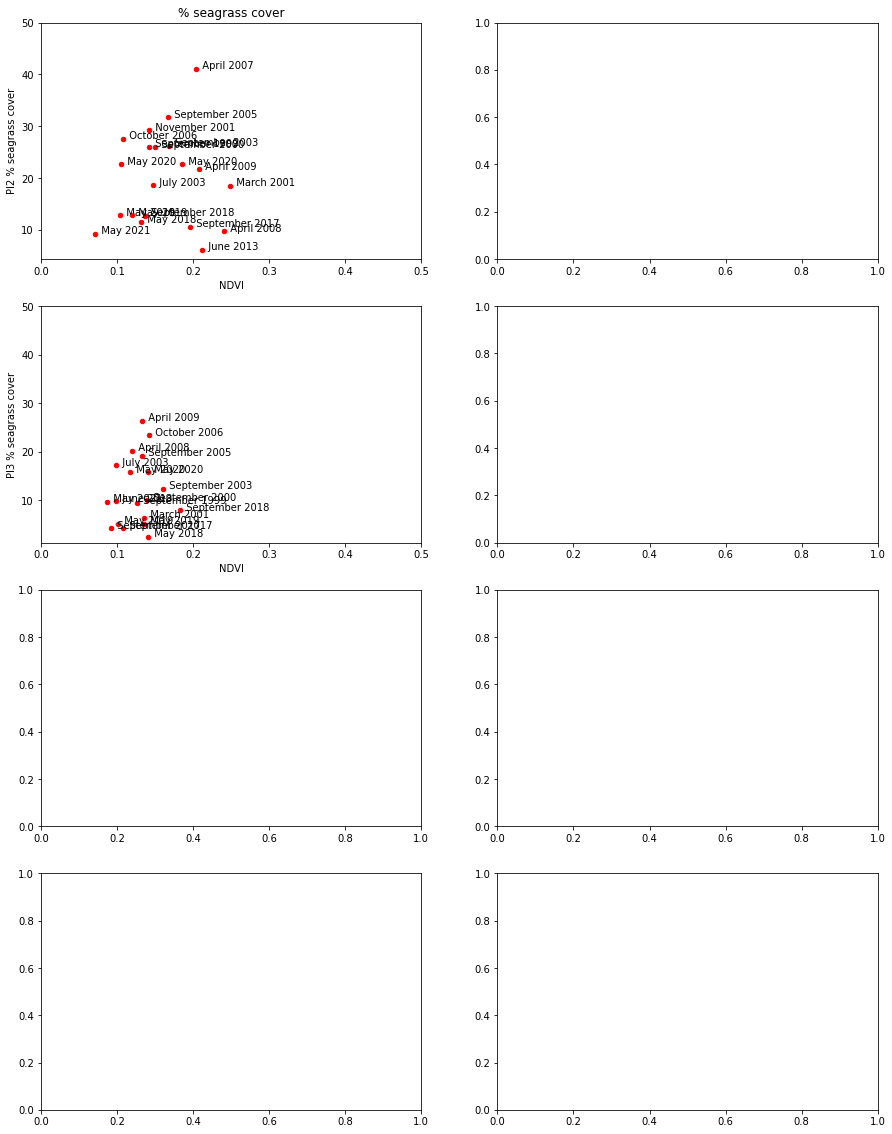

In [75]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(15,20))
# fig, ((ax1,ax3,ax5,ax7),(ax2,ax4,ax6,ax8)) = plt.subplots(2,4, figsize=(20,10))
# fig, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2,2, figsize=(10,10))

Blended.plot(x='LS_pg1_NDVI', y=Blended.columns[-3], kind='scatter',ax=ax1, color='red', xlabel='NDVI')
# Blended.plot(x='LS_pg1_NDVI', y='BH1 Canopy height (cm)', kind='scatter',ax=ax2, color='red')
Blended.plot(x='LS_pg2_NDVI', y=Blended.columns[-2], kind='scatter',ax=ax3, color='red', xlabel='NDVI')
# Blended.plot(x='LS_pg2_NDVI', y='BH3 Canopy height (cm)', kind='scatter',ax=ax4, color='red')
# Blended.plot(x='LS_pg1_NDVI', y='BH1 % algae cover', kind='scatter',ax=ax5, color='red')
# Blended.plot(x='LS_pg1_NDVI', y='BH3 % algae cover', kind='scatter',ax=ax6, color='red')
# Blended.plot(x='LS_pg2_NDVI', y='BH1 % epiphyte cover', kind='scatter',ax=ax7, color='red')
# Blended.plot(x='LS_pg2_NDVI', y='BH3 % epiphyte cover', kind='scatter',ax=ax8, color='red')

Blended.plot(x='S2_pg1_NDVI', y=Blended.columns[-3], kind='scatter',ax=ax1, color='red', xlabel='NDVI')
# Blended.plot(x='S2_pg1_NDVI'', y='BH1 Canopy height (cm)', kind='scatter',ax=ax2, color='red')
Blended.plot(x='S2_pg2_NDVI', y=Blended.columns[-2], kind='scatter',ax=ax3, color='red', xlabel='NDVI')
# Blended.plot(x='S2_BH3_NDVI', y='BH3 Canopy height (cm)', kind='scatter',ax=ax4, color='red')
# Blended.plot(x='S2_pg1_NDVI'', y='BH1 % algae cover', kind='scatter',ax=ax5, color='red')
# Blended.plot(x='S2_pg1_NDVI'', y='BH3 % algae cover', kind='scatter',ax=ax6, color='red')
# Blended.plot(x='S2_BH3_NDVI', y='BH1 % epiphyte cover', kind='scatter',ax=ax7, color='red')
# Blended.plot(x='S2_BH3_NDVI', y='BH3 % epiphyte cover', kind='scatter',ax=ax8, color='red')

ax1.set_ylim(ymax=50)
ax3.set_ylim(ymax=50)

ax1.set_xlim(xmin=0.0, xmax=0.50)
ax3.set_xlim(xmin=0.0, xmax=0.50)

for k in Blended.iterrows(): 
    ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
    ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][3], k[1][6]))
#     ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
    ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][7]))
    ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][4], k[1][7]))
# #     ax4.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
# #     ax5.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][7]))
# #     ax6.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
# #     ax7.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][9]))
# #     ax8.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][10]))

#     ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][3], k[1][6]))
# #     ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][3], k[1][8]))
#     ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][4], k[1][7]))
# #     ax4.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
# #     ax5.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][7]))
# #     ax6.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
# #     ax7.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][9]))
# #     ax8.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][10]))

# ax1.set_xlim(xmin=0, xmax=0.12)
# ax1.set_ylim(ymin=0, ymax=30)
# ax3.set_xlim(xmin=0, xmax=0.12)
# ax3.set_ylim(ymin=0, ymax=30)

# ax2.set_xlim(xmin=0, xmax=0.12)
# ax2.set_ylim(ymin=0, ymax=5)
# ax4.set_xlim(xmin=0, xmax=0.12)
# ax4.set_ylim(ymin=0, ymax=5)
    
ax1.set_title('% seagrass cover')
# ax1.xlabel('NDVI')
# ax2.set_title('Canopy height (cm)')
# ax5.set_title('% algae cover')
# ax6.set_title('% epiphyte cover')

# ax1.set_xticklabels('NDVI')

In [79]:
# S2_results2

## Rebuild to compare NDCI against field data

In [123]:
## Sentinel2 results
## This cell processes datasets that contain results for two polygons (pg1, pg2)

pg1_NDCI = S2_results2[pgid[0]][feat[0]].resample(time='1MS').mean(dim='time')
pg1_NDCI = pg1_NDCI.NDCI_zonal_timestep_median.dropna(dim='time')
pg1_NDCI = pg1_NDCI.to_dataframe()
pg1_NDCI = pg1_NDCI.rename(columns={'NDCI_zonal_timestep_median': 'S2_pg1_NDCI'})
S2_pg1_NDCI = pg1_NDCI.drop('spatial_ref', axis=1)
# BH1_NDVI.head()


pg2_NDCI = S2_results2[pgid[1]][feat[1]].resample(time='1MS').mean(dim='time')
pg2_NDCI = pg2_NDCI.NDCI_zonal_timestep_median.dropna(dim='time')
pg2_NDCI = pg2_NDCI.to_dataframe()
pg2_NDCI = pg2_NDCI.rename(columns={'NDCI_zonal_timestep_median': 'S2_pg2_NDCI'})
S2_pg2_NDCI = pg2_NDCI.drop('spatial_ref', axis=1)
# BH3_NDVI.head()

## Create empty continuous daterange to join dataframes to
start, end = date(1988, 8, 1), date(2021, 9, 1)
date_range = pd.date_range(start, end, freq = 'MS')

## Create master dataframe, 'alldates'
S2_alldates = pd.DataFrame(index=date_range)

## Join BH1
S2_alldates = S2_alldates.join(S2_pg1_NDCI, how='left')

## Join BH3
S2_alldates_pg1_pg2 = S2_alldates.join(S2_pg2_NDCI, how='left')

# # ## Join field_df (seagrasswatch observations)
# S2_alldates_all = S2_alldates_pg1_pg2.join(field_df, how='left')

# S2_alldates_pg1_pg2

S2_alldates_all = pd.merge(S2_alldates_pg1_pg2, field_df, left_on=S2_alldates_pg1_pg2.index, right_on=field_df.index)

S2_alldates_all.drop('key_0', axis=1)
S2_alldates_all.set_index('time', drop=True)

S2_alldates_all

Text(0.5, 1.0, '% seagrass cover')

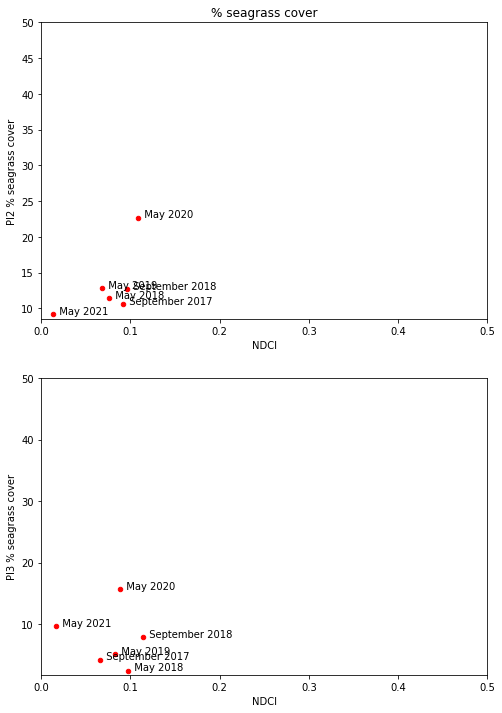

In [144]:
fig, ((ax1),(ax3)) = plt.subplots(2,1, figsize=(8,12))
# fig, ((ax1,ax3,ax5,ax7),(ax2,ax4,ax6,ax8)) = plt.subplots(2,4, figsize=(20,10))
# fig, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2,2, figsize=(10,10))

S2_alldates_all.plot(x=S2_alldates_all.columns[1], y=S2_alldates_all.columns[-3], kind='scatter',ax=ax1, color='red', xlabel='NDCI')
S2_alldates_all.plot(x=S2_alldates_all.columns[2], y=S2_alldates_all.columns[-2], kind='scatter',ax=ax3, color='red', xlabel='NDCI')


ax1.set_ylim(ymax=50)
ax3.set_ylim(ymax=50)

ax1.set_xlim(xmin=0.0, xmax=0.50)
ax3.set_xlim(xmin=0.0, xmax=0.50)

for k in S2_alldates_all.iterrows(): 
    ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][4]))
    ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][5]))


# ax1.set_xlim(xmin=0, xmax=0.12)
# ax1.set_ylim(ymin=0, ymax=30)
# ax3.set_xlim(xmin=0, xmax=0.12)
# ax3.set_ylim(ymin=0, ymax=30)

# ax2.set_xlim(xmin=0, xmax=0.12)
# ax2.set_ylim(ymin=0, ymax=5)
# ax4.set_xlim(xmin=0, xmax=0.12)
# ax4.set_ylim(ymin=0, ymax=5)
    
ax1.set_title('% seagrass cover')
# ax1.xlabel('NDVI')
# ax2.set_title('Canopy height (cm)')
# ax5.set_title('% algae cover')
# ax6.set_title('% epiphyte cover')

# ax1.set_xticklabels('NDVI')

Text(0.5, 1.0, '% epiphyte cover')

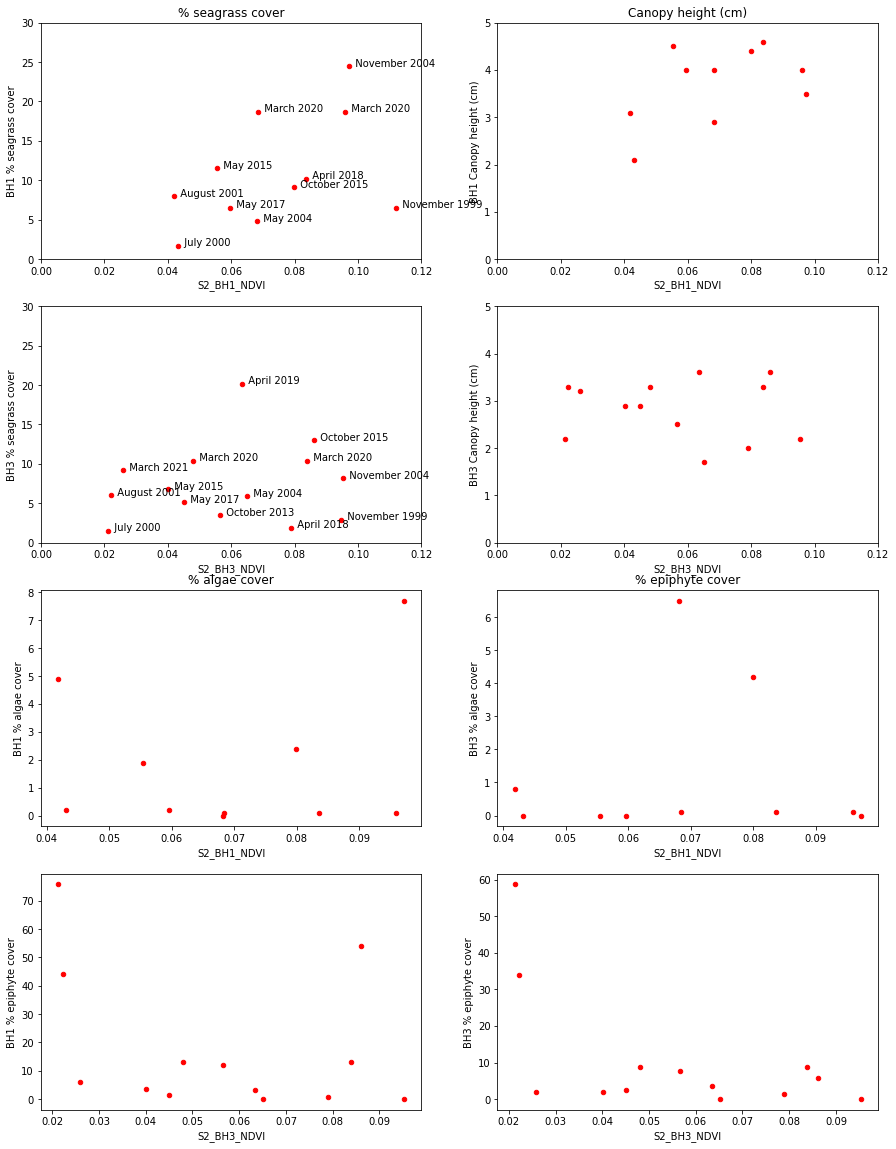

In [27]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(15,20))
# fig, ((ax1,ax3,ax5,ax7),(ax2,ax4,ax6,ax8)) = plt.subplots(2,4, figsize=(20,10))
# fig, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2,2, figsize=(10,10))

Blended.plot(x='LS_BH1_NDVI', y='BH1 % seagrass cover', kind='scatter',ax=ax1, color='red')
Blended.plot(x='LS_BH1_NDVI', y='BH1 Canopy height (cm)', kind='scatter',ax=ax2, color='red')
Blended.plot(x='LS_BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax3, color='red')
Blended.plot(x='LS_BH3_NDVI', y='BH3 Canopy height (cm)', kind='scatter',ax=ax4, color='red')
Blended.plot(x='LS_BH1_NDVI', y='BH1 % algae cover', kind='scatter',ax=ax5, color='red')
Blended.plot(x='LS_BH1_NDVI', y='BH3 % algae cover', kind='scatter',ax=ax6, color='red')
Blended.plot(x='LS_BH3_NDVI', y='BH1 % epiphyte cover', kind='scatter',ax=ax7, color='red')
Blended.plot(x='LS_BH3_NDVI', y='BH3 % epiphyte cover', kind='scatter',ax=ax8, color='red')

Blended.plot(x='S2_BH1_NDVI', y='BH1 % seagrass cover', kind='scatter',ax=ax1, color='red')
Blended.plot(x='S2_BH1_NDVI', y='BH1 Canopy height (cm)', kind='scatter',ax=ax2, color='red')
Blended.plot(x='S2_BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax3, color='red')
Blended.plot(x='S2_BH3_NDVI', y='BH3 Canopy height (cm)', kind='scatter',ax=ax4, color='red')
Blended.plot(x='S2_BH1_NDVI', y='BH1 % algae cover', kind='scatter',ax=ax5, color='red')
Blended.plot(x='S2_BH1_NDVI', y='BH3 % algae cover', kind='scatter',ax=ax6, color='red')
Blended.plot(x='S2_BH3_NDVI', y='BH1 % epiphyte cover', kind='scatter',ax=ax7, color='red')
Blended.plot(x='S2_BH3_NDVI', y='BH3 % epiphyte cover', kind='scatter',ax=ax8, color='red')

# ax1.set_ylim(ymax=25)
# ax2.set_ylim(ymax=25)

# ax1.set_xlim(xmin=0.03, xmax=0.13)
# ax2.set_xlim(xmin=0.03, xmax=0.13)

for k in Blended.iterrows():
    ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
#     ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
    ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][7]))
#     ax4.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
#     ax5.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][7]))
#     ax6.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
#     ax7.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][9]))
#     ax8.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][10]))

    ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][3], k[1][6]))
#     ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][3], k[1][8]))
    ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][4], k[1][7]))
#     ax4.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
#     ax5.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][7]))
#     ax6.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
#     ax7.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][9]))
#     ax8.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][10]))

ax1.set_xlim(xmin=0, xmax=0.12)
ax1.set_ylim(ymin=0, ymax=30)
ax3.set_xlim(xmin=0, xmax=0.12)
ax3.set_ylim(ymin=0, ymax=30)

ax2.set_xlim(xmin=0, xmax=0.12)
ax2.set_ylim(ymin=0, ymax=5)
ax4.set_xlim(xmin=0, xmax=0.12)
ax4.set_ylim(ymin=0, ymax=5)
    
ax1.set_title('% seagrass cover')
ax2.set_title('Canopy height (cm)')
ax5.set_title('% algae cover')
ax6.set_title('% epiphyte cover')

In [ ]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(15,20))
# fig, ((ax1,ax3,ax5,ax7),(ax2,ax4,ax6,ax8)) = plt.subplots(2,4, figsize=(20,10))
# fig, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2,2, figsize=(10,10))

testmerge2.plot(x='BH1_NDVI', y='BH1 % seagrass cover', kind='scatter',ax=ax1, color='red')
testmerge2.plot(x='BH1_NDVI', y='BH1 Canopy height (cm)', kind='scatter',ax=ax2, color='red')
testmerge2.plot(x='BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax3, color='red')
testmerge2.plot(x='BH3_NDVI', y='BH3 Canopy height (cm)', kind='scatter',ax=ax4, color='red')
testmerge2.plot(x='BH1_NDVI', y='BH1 % algae cover', kind='scatter',ax=ax5, color='red')
testmerge2.plot(x='BH1_NDVI', y='BH3 % algae cover', kind='scatter',ax=ax6, color='red')
testmerge2.plot(x='BH3_NDVI', y='BH1 % epiphyte cover', kind='scatter',ax=ax7, color='red')
testmerge2.plot(x='BH3_NDVI', y='BH3 % epiphyte cover', kind='scatter',ax=ax8, color='red')

# ax1.set_ylim(ymax=25)
# ax2.set_ylim(ymax=25)

# ax1.set_xlim(xmin=0.03, xmax=0.13)
# ax2.set_xlim(xmin=0.03, xmax=0.13)

# for k in testmerge2.iterrows():
#     ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][3]))
#     ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][4]))
#     ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][5]))
#     ax4.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
#     ax5.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][7]))
#     ax6.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
#     ax7.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][9]))
#     ax8.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][10]))
    
ax1.set_title('% seagrass cover')
ax2.set_title('Canopy height (cm)')
ax5.set_title('% algae cover')
ax6.set_title('% epiphyte cover')

In [ ]:
# testmerge = BH1_NDVI.join(BH3_NDVI, how='left')
# testmerge2 = pd.merge(testmerge, field_df, left_on=testmerge.index, right_on=field_df.index)
# testmerge2.drop('key_0', axis=1)
# testmerge2.set_index('time', drop=True)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
testmerge2.plot(x='BH1_NDVI', y='BH1 % seagrass cover', kind='scatter',ax=ax1)
testmerge2.plot(x='BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax2)

# ax1.set_ylim(ymax=25)
# ax2.set_ylim(ymax=25)

# ax1.set_xlim(xmin=0.03, xmax=0.13)
# ax2.set_xlim(xmin=0.03, xmax=0.13)

for k in testmerge2.iterrows():
    ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][4]))
    ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][5]))

In [ ]:
fig, ax = plt.subplots()
testmerge2.plot(x='BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax)

for k in testmerge2.iterrows():
    ax.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][], k[1][5]))

In [ ]:
## Plot polygon seasonal means (of timestep medians)

j=0
fig, axes = plt.subplots(nrows=len(results2), ncols=2,  figsize=(10, (len(results2)*4))) # sharex=True,
for k in results2:
    for kk in results2[k]:
        median = results2[k][kk].resample(time='1MS').mean(dim='time')
        medianarray =  median.NDVI_zonal_timestep_median.dropna(dim='time')
        medianarray[14:].plot.line('b-^', ax=axes[j,0])
        
        
#         median = results2[k][kk].groupby('time.year').mean(dim='time')#.sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))
#         median.plot.scatter(ax=axes[j,0], x='time', y='NDVI_zonal_timestep_median', color='red')
        

#         std = results2[k][kk].groupby('time.month').std(dim='time')#.sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))
#         (median + std).plot.scatter(ax=axes[j,0], x='month', y='NDVI_zonal_timestep_median', color='black')
#         (median - std).plot.scatter(ax=axes[j,0], x='month', y='NDVI_zonal_timestep_median', color='black')
        
#         obscounts =  results2[k][kk].groupby('time.month').count(dim='time')#.sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))
#         obscounts.plot.scatter(ax=axes[j,1], x='month', y='NDVI_zonal_timestep_median')#, type='histogram')
        
        axes[j,0].title.set_text('Polygon: ' + str(k) + ' NDVI')
        axes[j,1].title.set_text('Polygon ' + str(k) + ': Num. of observations')
        j=j+1

plt.show()

In [ ]:
print(testmerge2.index) # Merge hasn't worked properly. Dates missing.
field = field_df.index
bh3ndvi = BH3ndvi.time

In [ ]:
BH3ndvi.isel(time=0).NDVI.plot()#(index=0)

In [ ]:
# bh3ndvi = bh3ndvi.to_dataframe()
type(field)

In [ ]:
bh3ndvi = bh3ndvi.index
field

In [ ]:
bh3ndvi

In [ ]:
import numpy as np

In [ ]:
commondates_fieldbh3 = np.intersect1d(field, bh3ndvi)
commondates_fieldbh3

In [ ]:
len(commondates)